In [1]:
import depoML

import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

0.21999802303265145


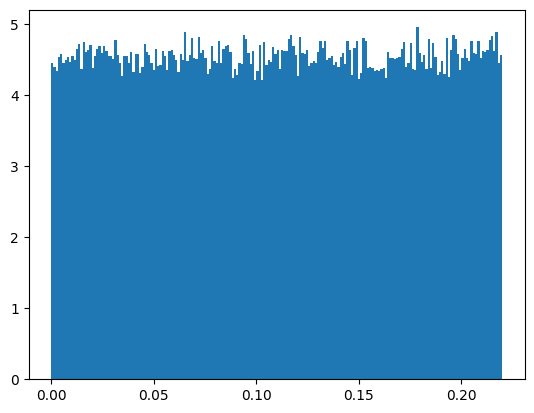

In [2]:
a = np.random.rand(int(2e5))*0.22
nptest = np.histogram(a, bins=200, range=[0, 0.22])
print(a.max())
fig, axs = plt.subplots()

dist = axs.hist(a, bins = 200, range=[0, 0.22], density=True)


In [3]:
print(dist[0])

distGen = dist[0]*1e3
# dist = axs.hist(a, bins = 100)

print(distGen)
print(np.sum(distGen))
distNorm = distGen*dist[1][1:]*2*np.pi

print(np.sum(distNorm))
print(distGen.shape)

[4.44545455 4.39545455 4.33636364 4.53636364 4.58181818 4.44545455
 4.49545455 4.53181818 4.47272727 4.54545455 4.5        4.65454545
 4.71818182 4.36363636 4.75       4.60909091 4.63636364 4.70454545
 4.37727273 4.55454545 4.64545455 4.68636364 4.59090909 4.69545455
 4.61363636 4.55454545 4.55       4.51363636 4.77727273 4.55909091
 4.44545455 4.26363636 4.55454545 4.54545455 4.45454545 4.60454545
 4.31818182 4.58181818 4.57272727 4.30909091 4.39090909 4.72272727
 4.60454545 4.55909091 4.45       4.35909091 4.65454545 4.40909091
 4.42727273 4.62272727 4.55       4.35       4.61363636 4.63181818
 4.55909091 4.49545455 4.32727273 4.57727273 4.5        4.88636364
 4.48636364 4.56363636 4.80909091 4.51818182 4.50909091 4.81818182
 4.59090909 4.63636364 4.51818182 4.29545455 4.36363636 4.68636364
 4.48636364 4.45       4.75454545 4.45       4.65       4.69545455
 4.70454545 4.60454545 4.24090909 4.36818182 4.28636364 4.45
 4.43636364 4.84090909 4.79545455 4.59090909 4.44090909 4.62727273
 

(632103,)


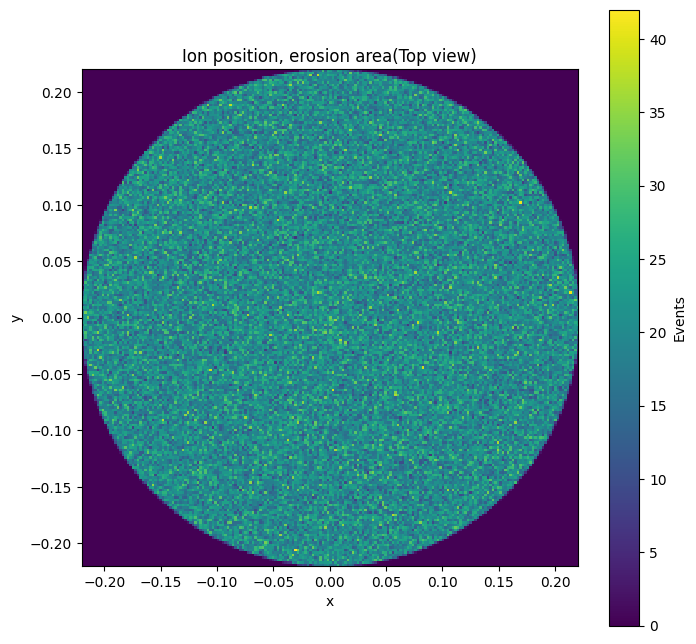

In [4]:
gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(distNorm[0][i])
    theta = np.random.rand(int(distNorm[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(distNorm[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [5]:
print(gen_dist_x.shape[0])

632103


In [6]:
test = depoML.depo(param = [1.6, -0.7], TS = 0.11, N = gen_dist_x.shape[0], sub_xy=[0,0])

In [10]:
deposit = test.run(5, 125, gen_dist_x, gen_dist_y)

running: 100%|██████████████████████████████████████████████████████| 100/100 [01:01<00:00, 1.62B/s]


In [8]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 60
left_side = 75
right_side = 75
film[:, 200-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[200-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

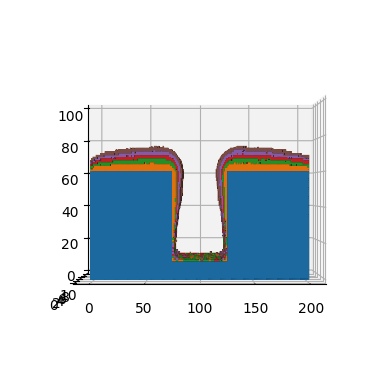

In [11]:
depoFilm_step8_edge2 = deposit
openWidth = 95

indice_wall = np.array(film[:, openWidth:200-openWidth, :] == 10)
# in_depo = np.logical_and(result[:, openWidth:200-openWidth, :] > 0, result[:, openWidth:200-openWidth, :] != 10)
in_depo = np.array(depoFilm_step8_edge2[:, openWidth:200-openWidth, :] == 20)
# in_depo2 = np.logical_and(result2[:, openWidth:200-openWidth, :] > 0, result2[:, openWidth:200-openWidth, :] != 10, result2[:, openWidth:200-openWidth, :] != 20)
in_depo2 = np.array(depoFilm_step8_edge2[:, openWidth:200-openWidth, :] == 40)
in_depo3 = np.array(depoFilm_step8_edge2[:, openWidth:200-openWidth, :] == 60)
in_depo4 = np.array(depoFilm_step8_edge2[:, openWidth:200-openWidth, :] == 80)
in_depo5 = np.array(depoFilm_step8_edge2[:, openWidth:200-openWidth, :] == 100)
in_depo6 = np.array(depoFilm_step8_edge2[:, openWidth:200-openWidth, :] == 120)
in_depo7 = np.array(depoFilm_step8_edge2[:, openWidth:200-openWidth, :] == 140)
in_depo8 = np.array(depoFilm_step8_edge2[:, openWidth:200-openWidth, :] == 160)
# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
ax.voxels(in_depo3)
ax.voxels(in_depo4)
ax.voxels(in_depo5)
ax.voxels(in_depo6)
ax.voxels(in_depo7)
ax.voxels(in_depo8)
ax.view_init(elev=0, azim=-90, roll=0)

In [12]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 60
left_side = 75
right_side = 75
film[:, 200-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[200-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2187118fd90>,
 (0, 0, 59): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188ab7db20>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188ae7c5e0>,
 (0, 1, 59): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188ae7c970>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188ae7cd00>,
 (0, 2, 59): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188f19f0d0>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188f19f460>,
 (0, 3, 59): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188f19f7f0>,
 (0, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188f19fb80>,
 (0, 4, 59): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188f19ff10>,
 (0, 5, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188f1af2e0>,
 (0, 5, 59): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188f1af670>,
 (0, 6, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2188f1afa00>,
 (0, 6

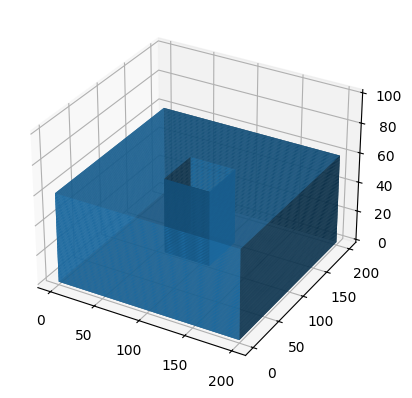

In [14]:
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(film)

In [29]:
film = np.zeros((200, 200, 100))

height = 60
film[:, :, 0:height] = 10 # bottom
left_side = 75
right_side = 75

thick = 70
film[:, 200-right_side:, height:thick] = 100
film[:, 0:left_side, height:thick] = 100
# film[200-right_side:, :, height:thick] = 10
# film[0:left_side, :, height:thick] = 10

(200, 200, 100)


{(0, 0, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21a7b0064f0>,
 (0, 0, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x21a812c8df0>,
 (0, 1, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x219d0a491c0>,
 (0, 1, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x219d0a49550>,
 (0, 2, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x219d0a498e0>,
 (0, 2, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x219d0a49c70>,
 (0, 3, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x219d0a49f70>,
 (0, 3, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x219d0a563d0>,
 (0, 4, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x219d0a56760>,
 (0, 4, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x219d0a56af0>,
 (0, 5, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x219d0a56e80>,
 (0, 5, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x219d0a67250>,
 (0, 6, 60): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x219d0a675e0>,

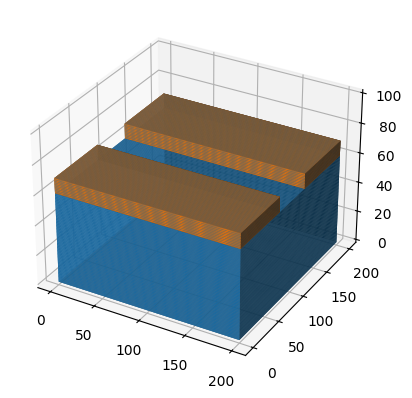

In [32]:
in_depo = np.array(film == 100)
print(in_depo.shape)

ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(film)
ax.voxels(in_depo)